In [1]:
import jsonlines
import json
import nltk
nltk.download('punkt')

claims=[]
with jsonlines.open('train.jsonl') as json_data:
    for obj in json_data:
        claims.append(obj['claim'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stefan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
word_dict={}
# also added punctuation in the dict and lowercase for all
for claim in claims:
    words = nltk.word_tokenize(claim)
    for word in words:
        try:
            word_dict[word.lower()]+=1
        except:
            word_dict[word.lower()]=1

In [4]:
import pandas as pd 
df_words = pd.DataFrame(word_dict.items(), columns=['word', 'count'])

In [24]:
df_words = df_words.sort(['count'], ascending=False)
df_words = df_words[~df_words['word'].isin(['.', ',', ')', '(', ';', ':'])]
df_words.head(10)
sum_count = df_words['count'].sum()
df_words['frequency'] = (df_words['count'] / sum_count)*100

In [25]:
df_words.head(10)

,word,count,frequency
7459,the,58279,4.886337
19453,a,51587,4.325254
8919,is,47145,3.952819
8926,in,41121,3.447744
13312,was,34051,2.854968
10851,of,27932,2.341927
15700,an,13760,1.153692
274,has,11795,0.988938
6748,by,11761,0.986088
15070,film,10878,0.912054


In [13]:
count_array = df_words['count']
count_array = count_array[:100]

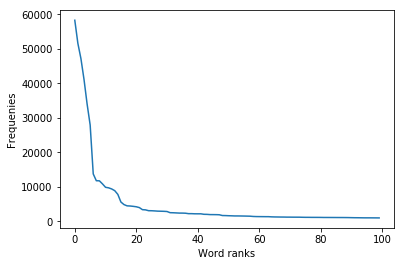

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(len(count_array)), count_array)
plt.xlabel('Word ranks')
plt.ylabel('Frequenies')
plt.show()